# **Ömer Faruk Güzel**

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt


#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [2]:
import time

batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


# Part 1: Analysis of Activation Functions


### Try other Activation Functions
Analyze the accuracy and training time
#### Example Syntax 
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='relu'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Sigmoid Activation Function

In [ ]:
start = time.time()

model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

stop = time.time()
duration = stop-start
print("Duration is: "+str(duration))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.3747 - accuracy: 0.6838 - val_loss: 0.3491 - val_accuracy: 0.9043
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3176 - accuracy: 0.9108 - val_loss: 0.2463 - val_accuracy: 0.9297
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2355 - accuracy: 0.9

### Relu Activation Function

In [ ]:
start = time.time()

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

stop = time.time()
duration = stop-start
print("Duration is: "+str(duration))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6269 - accuracy: 0.8291 - val_loss: 0.1939 - val_accuracy: 0.9423
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1806 - accuracy: 0.9459 - val_loss: 0.1494 - val_accuracy: 0.9542
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1259 - accuracy: 0.9

### Write your findings about activations here?

1.   First, I got 96.6% accuracy when I used "sigmoid" as activation function. Then I used "relu" instead of "sigmoid" and got 97.5% accuracy. That shows "relu" leads higher accuracy in this particular model.
2.   The model that uses "sigmoid" as activation function lasts for 15.599 seconds, we can say it lasts for ~15.6 seconds. The other model that uses "relu" as activation function lasts for 15.72 seconds. It seems "relu" takes slightyl longer than "sigmoid". 

  I think the choice between 1% higher accuracy and 0.12 seconds shorter time depends on the amount of data. If the amount is huge, then this 1% higher accuracy is dispensable.




# Part 2: Design Choices: Nodes
#### Analyze the parameter size, accuracy and training time

### Design a model with small Number of Nodes. For Example 8

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 2.0905 - accuracy: 0.3813 - val_loss: 1.3389 - val_accuracy: 0.7012
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 1.1603 - accuracy: 0.7287 - val_loss: 0.8223 - val_accuracy: 0.7897
Test loss: 0.822304368019104
Test accuracy: 0.7896999716758728
 
Duration is: 3.680680513381958
 
Sh

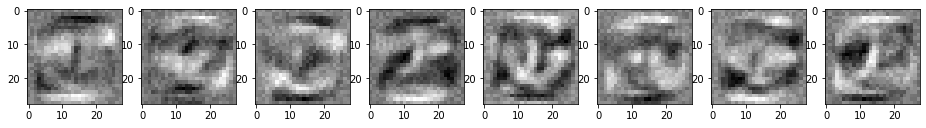

In [ ]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

start = time.time()

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

stop = time.time()
duration = stop-start
print(" ")
print("Duration is: "+str(duration))
print(" ")

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with large Number of Nodes. For example 128

In [ ]:
# Write your code here 

# Use the same layer design from the above cell. Play with the parameter "first_layer_size" above. 
# It is preferred to have first_layer_size as multiplication of 8 (for visualizing the weights properly)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 1.3956 - accuracy: 0.6351 - val_loss: 0.3576 - val_accuracy: 0.9125
Epoch 2/2
469/469 [==============================] - 2s 3ms/step - loss: 0.3185 - accuracy: 0.9171 - val_loss: 0.2314 - val_accuracy: 0.9347
Test loss: 0.23136568069458008
Test accuracy: 0.9347000122070312
 
Duration is: 3.95324277877807

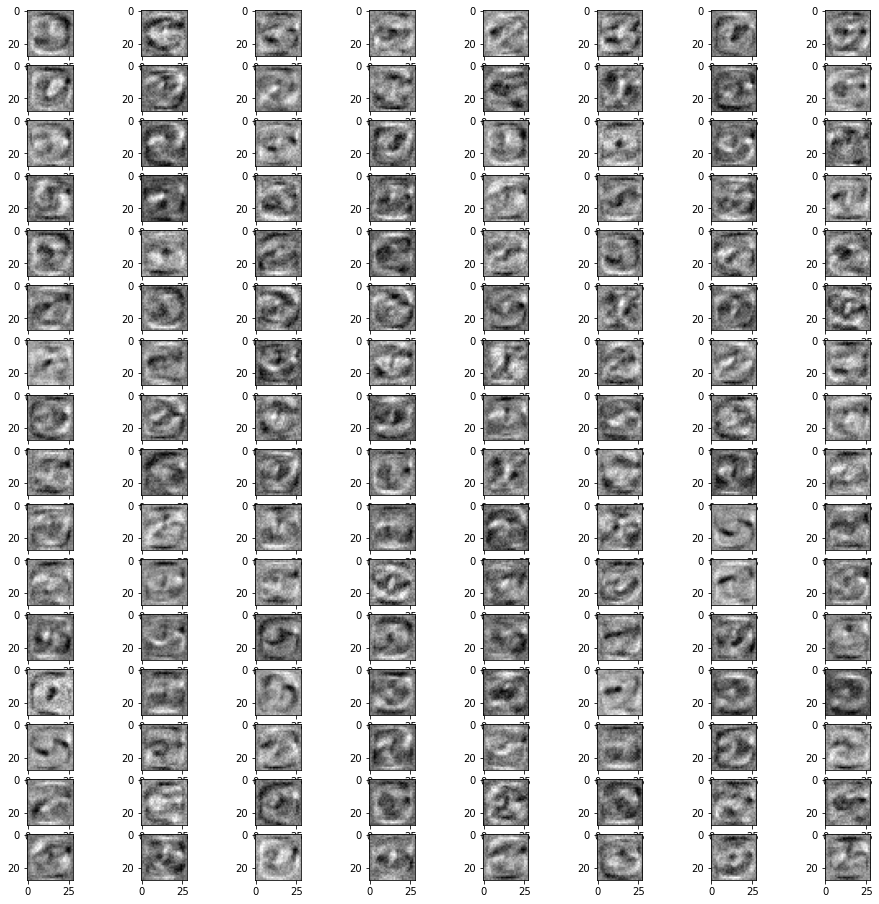

In [ ]:
first_layer_size = 128

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

start = time.time()

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

stop = time.time()
duration = stop-start
print(" ")
print("Duration is: "+str(duration))
print(" ")

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Write your findings about influence of nodes here?

1.   In the first model that is built with 8 nodes in the first layer, gives   6,898 trainable parameters and lasts for 3.68 seconds. Second model that is built with 128 nodes in the first layer, gives 104,938 trainable parameters and lasts for 3.95 seconds. That shows us, higher number of nodes in the first layer provides more trainable parameters and lasts slightly longer in this particular model.
2.   First model leads %78.9 accuracy in test set. Second one leads 93.4% in test set. We can say that deeper layers provides higher accuracy for this particular model. But deeper maybe not always good for us. In some other datasets and architectures, deeper layers may lead overfitting and may take very long computation time.




# Part 3: Design Choices: Layers
#### Analyze the parameter size, accuracy and training time

### Design a model with small number of layers. For example 1 hidden layer

In [5]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,))) #input layer
model.add(Dense(32, activation='relu'))                     #hidden layer
model.add(Dense(num_classes, activation='softmax'))         #output layer

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

start = time.time()

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

stop = time.time()
duration = stop-start
print(" ")
print("Duration is: "+str(duration))
print(" ")

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.7861 - accuracy: 0.7923 - val_loss: 0.2405 - val_accuracy: 0.9309
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2444 - accuracy: 0.9285 - val_loss: 0.1960 - val_accuracy: 0.9429
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1932 - accuracy: 0.9

### Higher number of Layers. For example 4 hidden layers

In [6]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,))) #input layer

model.add(Dense(32, activation='relu'))                     #hidden layer
model.add(Dense(32, activation='relu'))                     #hidden layer
model.add(Dense(32, activation='relu'))                     #hidden layer
model.add(Dense(32, activation='relu'))                     #hidden layer

model.add(Dense(num_classes, activation='softmax'))         #output layer

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

start = time.time()

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

stop = time.time()
duration = stop-start
print(" ")
print("Duration is: "+str(duration))
print(" ")

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
__________________________________________________

### Write your findings about influence of layers here?

1.   When I increased the number of hidden layers 1 to 4, trainable parameter number is also increased 26,506 to 29,674. Training time is increased almost 25% as 19.83 seconds to 24.44.
2.   Change in accuracies is very tiny, 0.11%. So, it seems the model passed the optimal point in the gradient pit. That also means after this point, model starts to overfit. 